In [6]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from datetime import datetime as dt
from datetime import timedelta, date
import matplotlib.image as mpimg
import random

# Load data 


In [36]:
tweet_data = pd.read_feather('tweets_by_state.feather')
poll_data= pd.read_feather('poll_data_by_state.feather')
poll_data.rename(columns={'allocationdate':'date'},inplace=True)
poll_data.set_index(['state','date'],inplace=True)
#tweet_data.head()
#poll_data.head()

adjpoll_clinton  adjpoll_trump
state date                                      
AK    2016-08-09        32.884945      44.525695
      2016-08-10        33.472672      43.995066
      2016-08-11        33.472672      43.995066
      2016-08-12        33.472672      43.995066
      2016-08-13        33.472672      43.995066

# TEMP: randomly add dummy data for sentiment

In [38]:
tweet_data['sentiment']=random.choices(["POS", "NEG"],k=len(tweet_data))

# Create datetime object

In [39]:
# Add column with date as datetime object
tweet_data['date']=pd.to_datetime(tweet_data['created_at'], format='%a %b %d %H:%M:%S +0000 %Y').dt.date

In [40]:
tweet_data.head()

,created_at,text,lang,full_location,country,state,sentiment,date
0,Fri Aug 12 10:04:02 +0000 2016,@BarackObama \n@FBI\n@LORETTALYNCH \nALL IN CO...,en,"Baton Rouge, LA",United States,LA,POS,2016-08-12
1,Fri Aug 12 10:04:30 +0000 2016,#CNN #newday clear #Trump deliberately throwin...,en,"Baltimore, MD",United States,MD,POS,2016-08-12
2,Fri Aug 12 10:04:46 +0000 2016,"@realDonaldTrump, you wouldn't recognize a lie...",en,"Palm Springs, CA",United States,CA,NEG,2016-08-12
3,Fri Aug 12 10:04:48 +0000 2016,"""Kid, you know, suing someone? Thats the most ...",en,"Secaucus, NJ",United States,NJ,NEG,2016-08-12
4,Fri Aug 12 10:04:48 +0000 2016,@HillaryClinton you ARE the co-founder of ISIS...,en,"Irving, TX",United States,TX,POS,2016-08-12


In [47]:
tweet_data1=tweet_data.groupby(['state','date'])['sentiment'].value_counts().unstack()
tweet_data1.head()

sentiment          NEG   POS
state date                  
AK    2016-08-12  11.0   6.0
      2016-08-13  11.0  18.0
      2016-08-14  12.0  10.0
      2016-08-15  14.0   7.0
      2016-08-16  12.0  10.0

In [49]:
data=tweet_data1.join(poll_data)
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1631 entries, ('AK', datetime.date(2016, 8, 12)) to ('WY', datetime.date(2016, 9, 12))
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NEG              1628 non-null   float64
 1   POS              1619 non-null   float64
 2   adjpoll_clinton  1020 non-null   float64
 3   adjpoll_trump    1020 non-null   float64
dtypes: float64(4)
memory usage: 134.9+ KB


In [53]:
data['total']=data['POS']+data['NEG']
data['POS_share']=data['POS']/data['total']
data['NEG_share']=data['NEG']/data['total']

Text(0, 0.5, 'Trump poll (%)')

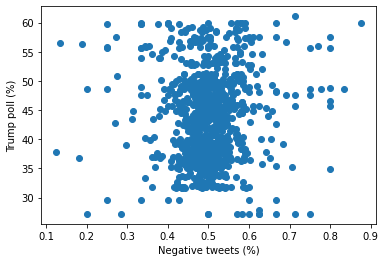

In [55]:
plt.scatter(data.NEG_share,data.adjpoll_trump)
plt.xlabel("Negative tweets (%)")
plt.ylabel("Trump poll (%)")